In [14]:
!pip install -r ./requirements.txt

In [17]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.30.0
ipykernel        : 6.29.5
ipywidgets       : not installed
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : not installed
nbformat         : not installed
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3


In [18]:
import sys
sys.version

'3.12.7 (main, Oct  5 2024, 01:39:55) [Clang 16.0.0 (clang-1600.0.26.4)]'

## Importing all of the packages

In [ ]:

# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For Word Cloud
from nltk.tokenize import TreebankWordTokenizer
from wordcloud import WordCloud

# For Youtube API
import os
import googleapiclient.discovery
import langid

# For classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, precision_score, roc_curve

from sklearn.pipeline import make_pipeline

# For stemming
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

# Clearing Output Cells
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hyunjoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## reading datsets

In [ ]:
ex_data = pd.read_csv("./Intro_to_ml_Learning_Concert_Spam_Classifier/Youtube-Spam-Dataset.csv")
ex_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [200]:
ex_data.isna().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [201]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [202]:
ex_data['CLASS'].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

In [203]:
ex_data.duplicated().sum()

np.int64(3)

In [204]:
ex_data = ex_data.drop_duplicates(keep = 'first')

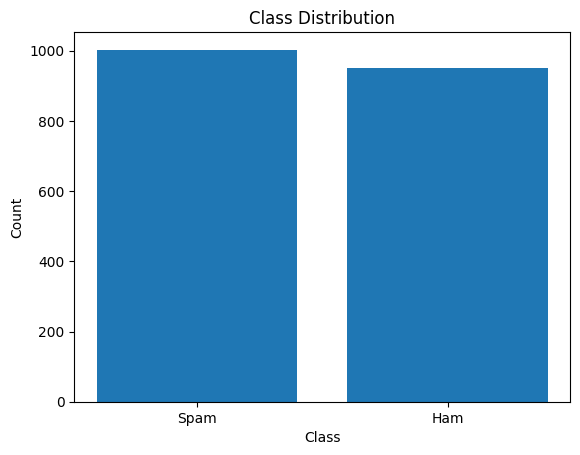

In [205]:
plt.bar(x = [0, 1], height = ex_data['CLASS'].value_counts())
plt.xticks(ticks = [0, 1], labels = ['Spam', 'Ham'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Class Distribution')
plt.show()

In [206]:
ex_data.drop(['COMMENT_ID', 'AUTHOR', 'DATE', 'VIDEO_NAME'], axis = 1, inplace = True)

In [207]:
ex_data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


We have a balanced Classes for dataframe 1

In [ ]:
ai_dataset = pd.read_csv("./Intro_to_ml_Learning_Concert_Spam_Classifier//ai_gen_dataset.csv")
ai_dataset.head()

,comments,class
0,Hot singles in your area! Check https://clickh...,1
1,"Such a lowkey vibe, fr!",0
2,"This video is so simp, I love it!",0
3,Invest $50 today and make $5000 in a week! Pro...,1
4,Y’all are really out here with the fire ideas....,0


In [209]:
ai_dataset.isnull().sum()

comments    0
class       0
dtype: int64

In [210]:
ai_dataset.duplicated().sum()

np.int64(363)

In [211]:
ai_dataset.drop_duplicates(keep = 'first', inplace=True)

In [212]:
ai_dataset['class'].value_counts()

class
1    499
0    138
Name: count, dtype: int64

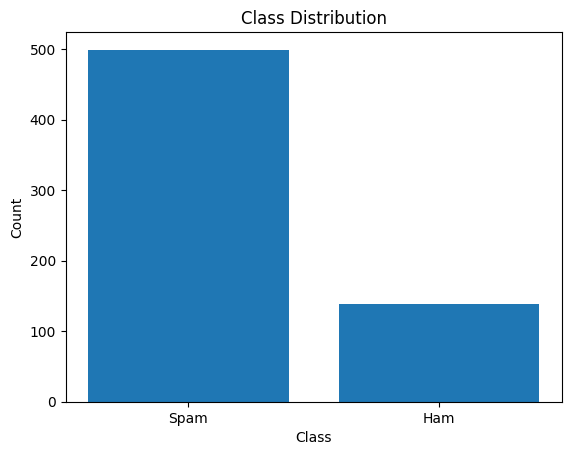

In [213]:
plt.bar(x = [0, 1], height = ai_dataset['class'].value_counts())
plt.xticks(ticks = [0, 1], labels = ['Spam', 'Ham'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Class Distribution')
plt.show()

ai_generated dataset has imbalanced class due to its duplicated comment data

# Word Cloud

## Tokenization

In [214]:
tokenizer = TreebankWordTokenizer() # Choosed most commonly using tokenizer.

ex_data['tokenized'] = ex_data['CONTENT'].apply(lambda x: tokenizer.tokenize(x.lower()))
ex_data.head()

,CONTENT,CLASS,tokenized
0,"Huh, anyway check out this you[tube] channel: ...",1,"[huh, ,, anyway, check, out, this, you, [, tub..."
1,Hey guys check out my new channel and our firs...,1,"[hey, guys, check, out, my, new, channel, and,..."
2,just for test I have to say murdev.com,1,"[just, for, test, i, have, to, say, murdev.com]"
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,"[me, shaking, my, sexy, ass, on, my, channel, ..."
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,"[watch, ?, v=vtarggvgtwq, check, this, out, .﻿]"


In [215]:
ex_data[ex_data['CLASS'] == 1]['tokenized'].head()

0    [huh, ,, anyway, check, out, this, you, [, tub...
1    [hey, guys, check, out, my, new, channel, and,...
2      [just, for, test, i, have, to, say, murdev.com]
3    [me, shaking, my, sexy, ass, on, my, channel, ...
4      [watch, ?, v=vtarggvgtwq, check, this, out, .﻿]
Name: tokenized, dtype: object

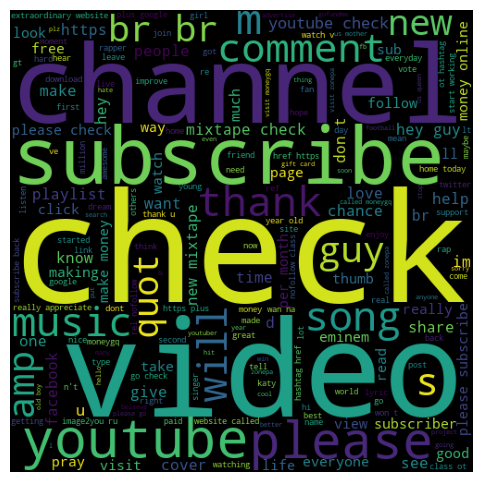

In [216]:
wc = WordCloud(width = 500, height = 500,
               min_font_size = 5, max_font_size = 200, background_color = 'black')
spam_wc = wc.generate(' '.join(ex_data[ex_data['CLASS'] == 1]['tokenized'].sum()))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

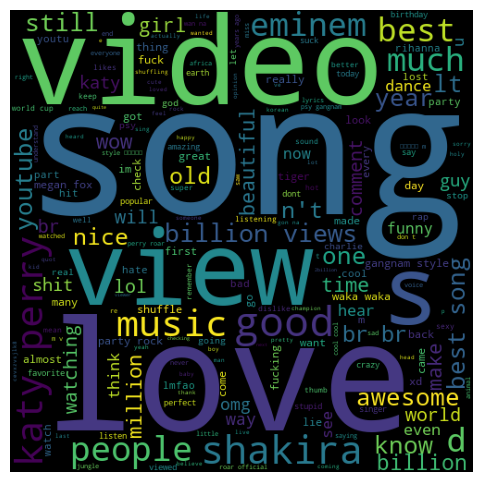

In [217]:
wc = WordCloud(width = 500, height = 500,
               min_font_size = 5, max_font_size = 200, background_color = 'black')
spam_wc = wc.generate(' '.join(ex_data[ex_data['CLASS'] == 0]['tokenized'].sum()))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

In [218]:
ai_dataset['tokenized'] = ai_dataset['comments'].apply(lambda x: tokenizer.tokenize(x))
ai_dataset.head()

,comments,class,tokenized
0,Hot singles in your area! Check https://clickh...,1,"[Hot, singles, in, your, area, !, Check, https..."
1,"Such a lowkey vibe, fr!",0,"[Such, a, lowkey, vibe, ,, fr, !]"
2,"This video is so simp, I love it!",0,"[This, video, is, so, simp, ,, I, love, it, !]"
3,Invest $50 today and make $5000 in a week! Pro...,1,"[Invest, $, 50, today, and, make, $, 5000, in,..."
4,Y’all are really out here with the fire ideas....,0,"[Y’all, are, really, out, here, with, the, fir..."


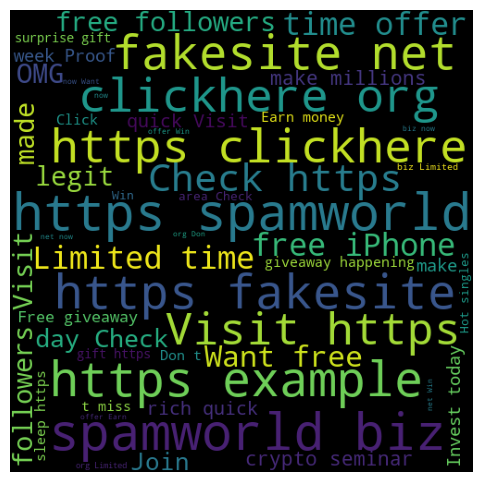

In [219]:
wc = WordCloud(width = 500, height = 500,
               min_font_size = 5, max_font_size = 200, background_color = 'black')
spam_wc = wc.generate(' '.join(ai_dataset[ai_dataset['class'] == 1]['tokenized'].sum()))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

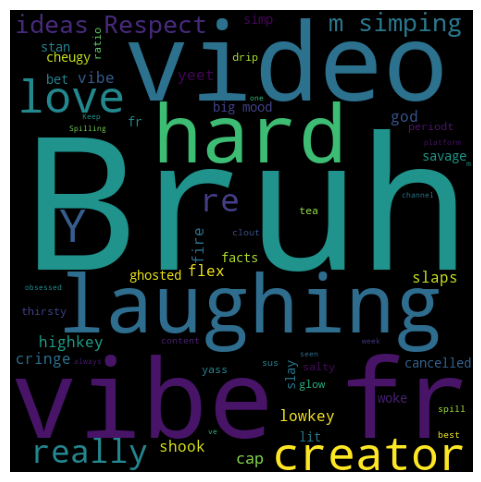

In [220]:
wc = WordCloud(width = 500, height = 500,
               min_font_size = 5, max_font_size = 200, background_color = 'black')
spam_wc = wc.generate(' '.join(ai_dataset[ai_dataset['class'] == 0]['tokenized'].sum()))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

In [221]:
ex_data.drop(['tokenized'], axis = 1, inplace = True)
ai_dataset.drop(['tokenized'], axis = 1, inplace = True)

# Classification

In [222]:
stemmer = PorterStemmer()

pipe = make_pipeline(
    TfidfVectorizer(),
    RandomForestClassifier(class_weight = 'balanced')
)

param_dict = {
    'tfidfvectorizer__max_df' : [0.6, 0.7, 0.8],
    'tfidfvectorizer__lowercase' : [True, False],
    'tfidfvectorizer__min_df' : list(range(2, 6)),
    'tfidfvectorizer__max_features' : list(range(100, 1800, 80)),
    'randomforestclassifier__max_depth' : list(range(5, 31, 5)),
    'randomforestclassifier__max_features' : [3, 5, 10],
    'randomforestclassifier__n_estimators' : [80, 100, 150, 200]
}

ex_model = RandomizedSearchCV(
    pipe,
    cv = 10,
    param_distributions = param_dict,
    n_iter = 60,
    scoring = 'f1',
    verbose = 1,
    random_state = 5
)
ai_model = RandomizedSearchCV(
    pipe,
    cv = 10,
    param_distributions = param_dict,
    n_iter = 60,
    scoring = 'f1',
    verbose = 1,
    random_state = 5
)

## Stemming

In [223]:
ex_data['CONTENT'] = ex_data['CONTENT'].apply(lambda x: x.replace('\r\n', ' ').lower())
ex_data['CONTENT'] = ex_data.CONTENT.apply(lambda x: ' '.join([stemmer.stem(i) for i in x.split() if i not in stopwords.words(('english'))]))

In [224]:
ai_dataset['comments'] = ai_dataset['comments'].apply(lambda x: x.replace('\r\n', ' ').lower())
ai_dataset['comments'] = ai_dataset.comments.apply(lambda x: ' '.join([stemmer.stem(i) for i in x.split() if i not in stopwords.words(('english'))]))

Changing Output Table To see full comment

In [225]:
# from google.colab import data_table

# data_table.enable_dataframe_formatter()

In [226]:
ex_data.sample(5)

,CONTENT,CLASS
870,could final spongebob start yesterday xd﻿,0
171,http://flipagram.com/f/luka1qmrhf﻿,1
1697,subscrib wil subscrib back﻿,1
1085,3m subscrib look view 700 million wtf :p﻿,1
652,segu ha https://www.facebook.com/marcos.sousa4...,1


In [227]:
ai_dataset.sample(5)

,comments,class
634,free giveaway happen https://example.com/985. ...,1
743,"omg, legit! made $500 day. check https://spamw...",1
432,invest $50 today make $5000 week! proof https:...,1
775,want free followers? visit https://fakesite.ne...,1
237,"bruh, laugh hard. fire!",0


In [228]:
ex_train, ex_test, ey_train, ey_test = train_test_split(ex_data['CONTENT'], ex_data['CLASS'], test_size = 0.3, random_state = 42)
ex_train.shape, ex_test.shape

((1367,), (586,))

In [229]:
%%time
ex_model.fit(ex_train, ey_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


KeyboardInterrupt: 

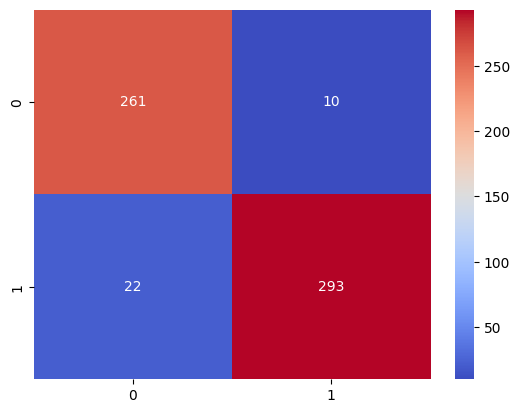

f1_score:  0.95
Precision_score:  0.97


In [ ]:
ex_pred = ex_model.predict(ex_test)
ex_conf = confusion_matrix(ey_test, ex_pred)
ex_f1 = f1_score(ey_test, ex_pred)
ex_prec = precision_score(ey_test, ex_pred)
sns.heatmap(ex_conf, annot = True, fmt = 'd', cmap = "coolwarm")
plt.show()
print("f1_score: ", round(ex_f1, 2))
print("Precision_score: ", round(ex_prec, 2))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ey_test, ex_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       271
           1       0.97      0.93      0.95       315

    accuracy                           0.95       586
   macro avg       0.94      0.95      0.95       586
weighted avg       0.95      0.95      0.95       586



In [ ]:
ai_train, ai_test, ai_y_train, ai_y_test = train_test_split(ai_dataset['comments'], ai_dataset['class'], test_size = 0.3, random_state = 42)
ai_train.shape, ai_test.shape

((445,), (192,))

In [ ]:
%%time
ai_model.fit(ai_train, ai_y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
CPU times: user 31 s, sys: 254 ms, total: 31.3 s
Wall time: 31.3 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced'))]),
                   n_iter=60,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              25,
                                                                              30],
                                        'randomforestclassifier__max_features': [3,
                                                                                 5,
                                                                                 10],
                                        'randomforestclassifier__n_estimators': [80,
                                                                                 100,
                                                                                 150,
                                                                                 200],
                                        'tfidfvectorizer__lowercase': [True,
                                                                       False],
                                        'tfidfvectorizer__max_df': [0.6, 0.7,
                                                                    0.8],
                                        'tfidfvectorizer__max_features': [100,
                                                                          180,
                                                                          260,
                                                                          340,
                                                                          420,
                                                                          500,
                                                                          580,
                                                                          660,
                                                                          740,
                                                                          820,
                                                                          900,
                                                                          980,
                                                                          1060,
                                                                          1140,
                                                                          1220,
                                                                          1300,
                                                                          1380,
                                                                          1460,
                                                                          1540,
                                                                          1620,
                                                                          1700,
                                                                          1780],
                                        'tfidfvectorizer__min_df': [2, 3, 4,
                                                                    5]},
                   random_state=5, scoring='f1', verbose=1)

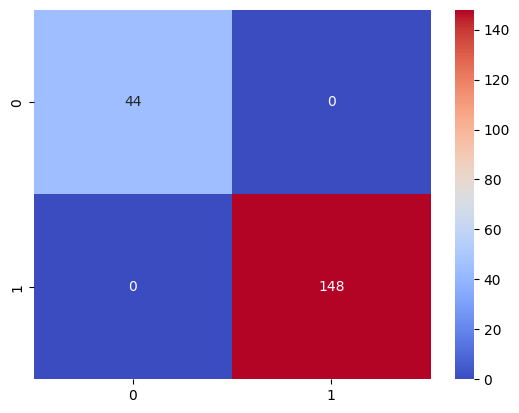

f1_score:  1.0
Precision_score:  1.0


In [ ]:
ai_pred = ai_model.predict(ai_test)
ai_conf = confusion_matrix(ai_y_test, ai_pred)
ai_f1 = f1_score(ai_y_test, ai_pred)
ai_prec = precision_score(ai_y_test, ai_pred)
sns.heatmap(ai_conf, annot = True, fmt = 'd', cmap = "coolwarm")
plt.show()
print("f1_score: ", round(ai_f1, 2))
print("Precision_score: ", round(ai_prec, 2))

In [ ]:
print(classification_report(ai_y_test, ai_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       148

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [ ]:
ai_conf

array([[ 44,   0],
       [  0, 148]])

<img src = 'https://miro.medium.com/v2/resize:fit:743/1*s4hqQfTFHM3ByzTfgypp0Q.png'></img>

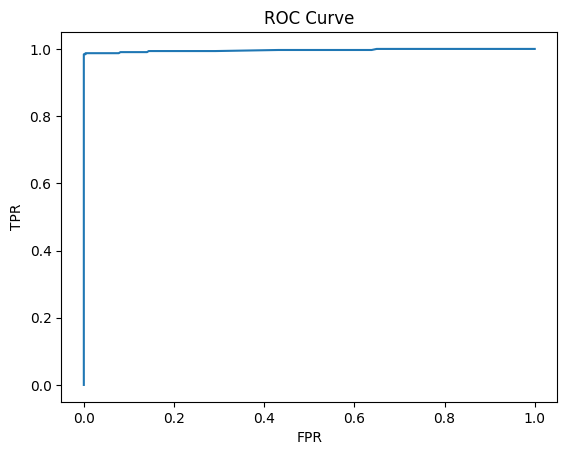

In [ ]:
ex_preds = ex_model.predict_proba(ex_test)

fpr, tpr, thresholds = roc_curve(ey_test, ex_preds[:, 1], pos_label=1)

fig, ax = plt.subplots(1,1)
fig.figsize = (20 , 5) 
ax.plot(fpr, tpr)
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title('ROC Curve')   
plt.show()

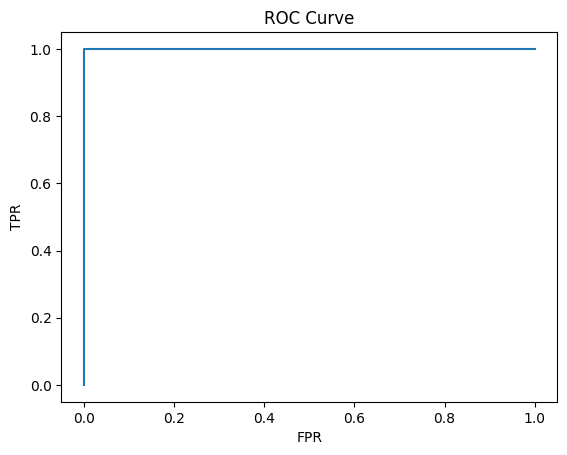

In [ ]:
ai_preds = ai_model.predict_proba(ai_test)
fpr, tpr, thresholds = roc_curve(ai_y_test, ai_preds[:, 1], pos_label=1)


fig, ax = plt.subplots(1,1)
fig.figsize = (20 , 5)
ax.plot(fpr, tpr)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title('ROC Curve')
plt.show()

In [ ]:
ex_model

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced'))]),
                   n_iter=60,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              25,
                                                                              30],
                                        'randomforestclassifier__max_features': [3,
                                                                                 5,
                                                                                 10],
                                        'randomforestclassifier__n_estimators': [80,
                                                                                 100,
                                                                                 150,
                                                                                 200],
                                        'tfidfvectorizer__lowercase': [True,
                                                                       False],
                                        'tfidfvectorizer__max_df': [0.6, 0.7,
                                                                    0.8],
                                        'tfidfvectorizer__max_features': [100,
                                                                          180,
                                                                          260,
                                                                          340,
                                                                          420,
                                                                          500,
                                                                          580,
                                                                          660,
                                                                          740,
                                                                          820,
                                                                          900,
                                                                          980,
                                                                          1060,
                                                                          1140,
                                                                          1220,
                                                                          1300,
                                                                          1380,
                                                                          1460,
                                                                          1540,
                                                                          1620,
                                                                          1700,
                                                                          1780],
                                        'tfidfvectorizer__min_df': [2, 3, 4,
                                                                    5]},
                   random_state=5, scoring='f1', verbose=1)

In [ ]:
ai_model

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced'))]),
                   n_iter=60,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              25,
                                                                              30],
                                        'randomforestclassifier__max_features': [3,
                                                                                 5,
                                                                                 10],
                                        'randomforestclassifier__n_estimators': [80,
                                                                                 100,
                                                                                 150,
                                                                                 200],
                                        'tfidfvectorizer__lowercase': [True,
                                                                       False],
                                        'tfidfvectorizer__max_df': [0.6, 0.7,
                                                                    0.8],
                                        'tfidfvectorizer__max_features': [100,
                                                                          180,
                                                                          260,
                                                                          340,
                                                                          420,
                                                                          500,
                                                                          580,
                                                                          660,
                                                                          740,
                                                                          820,
                                                                          900,
                                                                          980,
                                                                          1060,
                                                                          1140,
                                                                          1220,
                                                                          1300,
                                                                          1380,
                                                                          1460,
                                                                          1540,
                                                                          1620,
                                                                          1700,
                                                                          1780],
                                        'tfidfvectorizer__min_df': [2, 3, 4,
                                                                    5]},
                   random_state=5, scoring='f1', verbose=1)

# Predicting Real Comments

In [ ]:
import os
import googleapiclient.discovery

def new_get_Pvideo(api_key, category_id, n_videos):
    '''
    It'll return (video_id, title) of the most popular 5 videos embeded by list
    10 - Music | 17 - Sports | 20 - Gaming | 25 - News & Politics
    '''
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    DEVELOPER_KEY = api_key

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey = DEVELOPER_KEY)

    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        maxResults= int(n_videos),
        regionCode="US",
        videoCategoryId= str(category_id)
    )
    response = request.execute()
    return [[response['items'][i]['id'], response['items'][i]['snippet']['title']] for i in range(len(response['items']))]


In [ ]:
def new_get_comments(n_pages, api_key = str, video_id = str):
    """ It'll return n * 50 comments which is written on given video. """
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    DEVELOPER_KEY = api_key

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey = DEVELOPER_KEY)

    responses = []
    n_page = ''
    while len(responses) < n_pages * 50:
        try:
            request = youtube.commentThreads().list(
                part="snippet,replies",
                maxResults=50,
                videoId=video_id,
                pageToken = n_page,
                order="orderUnspecified"
            )
            response = request.execute()

            # responses.extend([response['items'][i]['snippet']['topLevelComment']['snippet']['textOriginal'] for i in range(len(response['items'])) if langid.classify(response['items'][i]['snippet']['topLevelComment']['snippet']['textOriginal']) == 'en'])
            for i in range(len(response['items'])):
                if len(responses) == n_pages * 50:
                    break
                text = response['items'][i]['snippet']['topLevelComment']['snippet']['textOriginal']
                if langid.classify(text)[0] == 'en' and len(text.split()) > 1:
                    responses.append(text)

            try:
                n_page = response['nextPageToken']
            except:
                print("Key Not Found.")
                n_page = ''
        except:
            print("Page Access denied.")
            break
    return responses


In [ ]:
# music_ids = new_get_Pvideo(api_key = api_key,
#                            category_id = 10,
#                            n_videos = 10)
#  # 10 music, 17 sports, 20 game, 25 Politics
# sports_ids = new_get_Pvideo(api_key = api_key,
#                             category_id = 17,
#                             n_videos = 10)
# game_ids = new_get_Pvideo(api_key = api_key,
#                           category_id = 20,
#                           n_videos = 10)

# pol_ids = new_get_Pvideo(api_key = api_key,
#                          category_id = 25,
#                          n_videos = 10)
# videos = []
# for i in [music_ids, sports_ids, game_ids, pol_ids]:
#     videos.extend(i)

# videos, len(videos), videos[0]

In [ ]:
# !pip install langid
# import langid

# comments = []

# for id, title in videos:
#     vomments = new_get_comments(n_pages = 0.5,
#                     api_key = api_key,
#                     video_id = id)
#     comments.extend([[id, title, vomment] for vomment in vomments])
# comments[0]

In [ ]:
# comments[0], len(comments)

In [ ]:
# import pandas as pd

# new_com_df = pd.DataFrame(comments, columns = ['Video_Id', 'Video_Title', 'Comments'])
# new_com_df

In [ ]:
# new_com_df = new_com_df.concat(pd.Series(np.zeros(len(new_com_df)), name = 'Prediction'))
# new_com_df.to_csv("Youtube-Spam-Dataset.csv")

In [ ]:
df2 = pd.read_csv("./Intro_to_ml_Learning_Concert_Spam_Classifier/Real_Recent_Comments.csv")
df2.drop(['index', 'Video_Id', 'Video_Title'], axis = 1, inplace=  True)
# real.drop(['index', 'Video_Id', 'Video_Title'], axis = 1, inplace = True)

to_drop = [156, 158, 163, 173]
to_drop.extend([i for i in range(625, 648)])
to_one = [8, 270, 430, 496, 614, 649, 974]

for i in range(len(df2)):
    if i in to_one:
        df2.at[i, 'Class'] = 1
    elif i in to_drop:
        df2.drop(i, inplace = True, axis = False)
    else:
        df2.at[i, 'Class'] = 0

df2['Class'] = df2['Class'].astype(int)
df2.head(3)

,Comments,Class
0,This is so lazy....really bad,0
1,Did she diss ice spice? Why they show her wig,0
2,"""This time, it's cooler"" Funny Boosie",0


In [ ]:
df2['stemComments'] = df2['Comments'].apply(lambda x: x.replace('\r\n', ' ').lower())
df2['stemComments'] = df2.stemComments.apply(lambda x: ' '.join([stemmer.stem(i) for i in x.split() if i not in stopwords.words(('english'))]))

In [ ]:
df2.head(10)

,Comments,Class,stemComments
0,This is so lazy....really bad,0,lazy....r bad
1,Did she diss ice spice? Why they show her wig,0,diss ice spice? show wig
2,"""This time, it's cooler"" Funny Boosie",0,"""thi time, cooler"" funni boosi"
3,Good afternoon 2:41 2:45,0,good afternoon 2:41 2:45
4,3h later I’m still here.😂,0,3h later i’m still here.😂
5,Them baby phat jackets was fire tho 🔥,0,babi phat jacket fire tho 🔥
6,Another D.W.I approaching,0,anoth d.w.i approach
7,Sexy CAn rap,0,sexi rap
8,Glorilla continues to release incredible music...,1,glorilla continu releas incred music! sexi red...
9,They looking like snacks,0,look like snack


In [ ]:
%%time
ex_data.columns = ai_dataset.columns
con = pd.concat([ex_data, ai_dataset])
con_model = RandomizedSearchCV(
    pipe,
    cv = 10,
    param_distributions = param_dict,
    n_iter = 60,
    scoring = 'f1',
    verbose = 1,
    random_state = 5
)

con_model.fit(con['comments'], con['class'])

Fitting 10 folds for each of 60 candidates, totalling 600 fits
CPU times: user 49.3 s, sys: 573 ms, total: 49.9 s
Wall time: 50.2 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced'))]),
                   n_iter=60,
                   param_distributions={'randomforestclassifier__max_depth': [3,
                                                                              5,
                                                                              10,
                                                                              15],
                                        'randomforestclassifier__max_features': [3,
                                                                                 5,
                                                                                 10],
                                        'randomforestclassifier__n_estimators': [80,
                                                                                 100,
                                                                                 150,
                                                                                 200],
                                        'tfidfvectorizer__lowercase': [True,
                                                                       False],
                                        'tfidfvectorizer__max_df': [0.6, 0.7,
                                                                    0.8],
                                        'tfidfvectorizer__max_features': [100,
                                                                          900,
                                                                          1700],
                                        'tfidfvectorizer__min_df': [2, 3, 4,
                                                                    5]},
                   random_state=5, scoring='f1', verbose=1)

In [ ]:
con_model.best_score_

np.float64(0.9427269911232544)

In [ ]:
df2['con_class'] = con_model.predict(df2['stemComments'])
print(classification_report(df2['Class'], df2['con_class']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       966
           1       0.08      0.43      0.14         7

    accuracy                           0.96       973
   macro avg       0.54      0.70      0.56       973
weighted avg       0.99      0.96      0.97       973



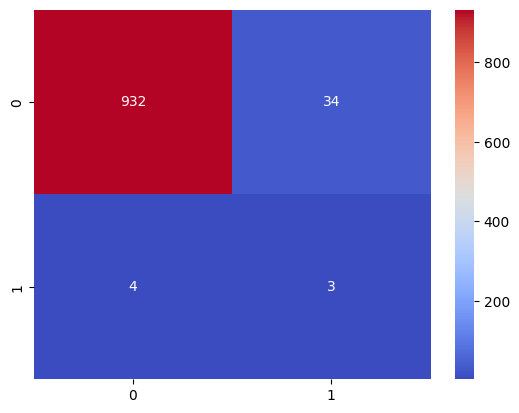

In [ ]:
con_conf = confusion_matrix(df2['Class'], df2['con_class'])
sns.heatmap(con_conf, annot=True, fmt = 'd', cmap = 'coolwarm')
plt.show()

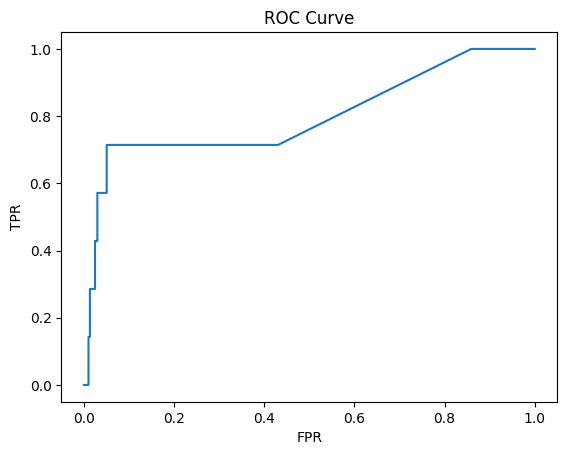

In [ ]:
con_preds = con_model.predict_proba(df2['stemComments'])

fpr, tpr, thresholds = roc_curve(df2['Class'], con_preds[:, 1], pos_label=1)

fig, ax = plt.subplots(1,1)
fig.figsize = (20 , 5) 
ax.plot(fpr, tpr)
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title('ROC Curve')
plt.show()

In [ ]:
f1_score(df2['Class'], df2['con_class'])

np.float64(0.13636363636363635)

In [ ]:
df2.to_csv("../Result.csv")

In [ ]:
df2[(df2['Class'] != df2['con_class']) & (df2['con_class'] == 1)]['Comments'].values

array(['Boosie wasn’t playing bout that check this time he said lemme be in the video too this song legally mine lol',
       'Free Bradley my fiancé this is how I feel with him all the way sang it to him on the jail phone and the whole album we spent so much money in phone calls just singing rod wave ❤❤… and free my brother !!! Free my dad ! Free my mom',
       'Soltera me sigam please 500 k😢',
       'Soltera", carries a strong message of confidence, independence and joy in living a free life. This could be Shakira\'s affirmation that women do not need to rely on anyone else to feel happy or successful. The upbeat beat and sharp lyrics,\nlove her too much',
       'In the next 25years. This video will still  be on YouTube, please y’all just know that a Nigerian 🇳🇬was here. ❤4L',
       '34-3 stfu talking about rent free OU is dog water and everyone knows this that why they all transfer out 😂😂😂',
       'Credit:\n\n(via https://x.com/gcotham21/Twitter)\n(via https://x.com/billyderric

In [ ]:
df2[(df2['Class'] == df2['con_class']) & (df2['con_class'] == 0)]['Comments'].values

array(['This is so lazy....really bad',
       'Did she diss ice spice? Why they show her wig',
       '"This time, it\'s cooler" Funny Boosie',
       'Good afternoon 2:41 2:45', '3h later I’m still here.😂',
       'Them baby phat jackets was fire tho 🔥',
       'Another D.W.I approaching', 'Sexy CAn rap',
       'They looking like snacks', 'Can’t front this 💩 is fiyah 🔥',
       '“It’s colder this time “ lol 😂 🧴',
       'I like this song but I hate how she says hair',
       "They energy ain't mesh ...it's 🔥tho Boosie should've slid",
       "Glorilla she's a real genious",
       'lol boosie should’ve jumped on this 💞', 'CLAP CLAP CLAP CLAP',
       'When bitches from M town harder than most men from the rest of the country and Tennessee see you St. Louis',
       'RED LOOKIN LIKE A MAN', 'I see the Boosie fade!', 'This is sick',
       'I’ve done watched this video like 15 times😂',
       'I adore the slender and natural-looking women!',
       'She should have put gloss on here',

In [ ]:
df2[(df2['Class'] == df2['con_class']) & (df2['con_class'] == 1)]['Comments'].values

array(['Glorilla continues to release incredible music! Sexy Red also appeared in HAM! After they discovered the SHORT on my channel describing how all of those artists are currently becoming so successful, they both significantly advanced in their professions.',
       "The song 🗿\nThe creator  🗿\nThe instrumental 🗿\nThe viewers 🗿\nThe song listener🗿\nThe saver of the song🗿\nThe one who added this song in his playlist 🗿\nThe one who got motivated and went to gym after listening this🗿 masterpiece 🗿\nThe whole gym 🗿\nAll the gym equipments including the mats🗿\nThe gym shoes 🗿\nThe one who play this at gym🗿\nThe jar of whey powder 🗿\nThe Steroid 🗿\nThe motor fiber bundle 🗿\nThe gymbro's blood cells🗿\nAll who listens it 🗿\nAll who get more excit🗿ed to do more reps\nThe nerves of the body 🗿\nThe veins and arteries🗿\nThe blood streaming at speed of light after hearing this🗿\nThe comments🗿\nThe thoughts while writing this 🗿\nMy hands while typing this 🗿\nThe keyboard🗿\nThe emoji 🗿\nThe alpha

In [ ]:
df2[(df2['Class'] != df2['con_class']) & (df2['con_class'] == 0)]['Comments'].values

array(['My turn!\n\n           YesYes\n       Yes          Yes\n      Yes            Yes\n      Yes            Yes\n       Yes          Yes\n            YesYes',
       'Hey Aph! Can we possibly do a video Collab? let me know in a private message if thats even possible',
       '2nd pin me pls',
       "Hello, I was wondering, if I can share with you the most important thing.  God the Father sent His holy Son Jesus to earth, to be born of a virgin.  He grew up and died on the cross for our sins.  Then He was put into a tomb for 3 days, after that Abba Father raised Jesus to life.He appeared to people, and went back to heaven.  We all must sincerely receive Jesus into our life to be God's child.  See John 1:12 for this please.  Will you today genuinely by faith receive Jesus into your life for salvation?"],
      dtype=object)

In [ ]:
new_comment = input("Enter the Comment: ")
prediction = con_model.predict_proba([new_comment])
if prediction[0][1] >= 0.5:
    print("Comment: ", new_comment)
    print(f"The comment you entered is {round(prediction[0][1] * 100, 1)}% Spam ")
else:
    print("Comment: ", new_comment)
    print(f"The comment you entered is {round(prediction[0][0] * 100, 1)}% Ham ")

Comment:  This model is suitable for small companies if you think it's not a true, check my link below!
The comment you entered is 78.3% Spam 
